In [ ]:
!pip install ydata_profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=dcde1077f617335bb3fd58cf72d9b152e601b66fa1564bb163c3c08bc7635d62
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordcloud-1.8.2.2:
      Successfully uninstalled wordcloud-1.8.2.2


In [ ]:
!pip install polars

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from ydata_profiling import ProfileReport

import polars as pl
print('polars_version:',pl.__version__)

from scipy.stats import f_oneway

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.dummy import DummyClassifier
#from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score,recall_score, precision_score, roc_curve, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

polars_version: 0.17.3


In [2]:
RANDOM_STATE = 12345
TEST_SIZE = 0.20

In [3]:
from google.colab import files
files.upload()

Saving online_shoppers_intention.csv to online_shoppers_intention.csv


{'online_shoppers_intention.csv': b'Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue\n0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False\n0,0.0,0,0.0,2,64.0,0.0,0.1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False\n0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False\n0,0.0,0,0.0,2,2.666666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False\n0,0.0,0,0.0,10,627.5,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False\n0,0.0,0,0.0,19,154.2166667,0.015789474,0.024561404,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False\n0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False\n1,0.0,0,0.0,0,0.0,0.2,0.2,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False\n0,0.0,0,0.0,2,37.0,0.0,,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,Fal

# описание датасета

Online Shoppers Purchasing Intention Dataset

The Revenue attribute can be used as the class label.

Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.

The Bounce Rate, Exit Rate and Page Value features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of Bounce Rate feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The Page Value feature represents the average value for a web page that a user visited before completing an e-commerce transaction.

The Special Day feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.


- **Revenue** может быть использован в качестве метки класса.
- **Administrative, Administrative Duration, Informational, Informational Duration, Product Related and Product Related Duration** представляют количество различных типов страниц, посещенных посетителем за этот сеанс, и общее время, проведенное в каждой из этих категорий страниц. Значения этих функций выводятся из информации об URL-адресах страниц, посещаемых пользователем, и обновляются в режиме реального времени, когда пользователь совершает какое-либо действие, например, переходит с одной страницы на другую.
- **Bounce Rate** характеристика веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают его (Bounce, "отскакивают"), не вызывая никаких других запросов к серверу аналитики в течение этого сеанса. (metrics measured by "Google Analytics")
- **Exit Rate** значения для конкретной веб-страницы рассчитывается как для всех просмотров страницы в процентах, которые были последними в сеансе.
(metrics measured by "Google Analytics")
- **Page Value** представляет среднее значение для веб-страницы, которую пользователь посетил перед завершением транзакции электронной коммерции (metrics measured by "Google Analytics")
- **Special Day** функция указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню Святого Валентина), в который сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной коммерции, такой как промежуток времени между датой заказа и датой доставки. Например, для дня Святого Валентина это значение принимает ненулевое значение в период со 2 по 12 февраля, ноль до и после этой даты, если только она не близка к другому особому дню, и его максимальное значение равно 1 8 февраля.
- Набор данных также включает операционную систему, браузер, регион, тип трафика, тип посетителя как возвращающегося или нового посетителя,(**Operating System, Browser, Region, Traffic Type, Visitor Type**) логическое значение, указывающее, является ли дата посещения выходным днем, и месяц года (**Weekend, Month**).


Цель: предсказать возможность покупки (выявить максимально влияющие признаки), задача классификации

In [4]:
df = pd.read_csv('online_shoppers_intention.csv')

In [ ]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


## задание 1
проверить размеры таблицы, число столбцов, количество пропусков в столбцах

In [ ]:
print('количество строк таблицы:',df.shape[0])
print('***')
print('количество столбцов таблицы:',df.shape[1])
print('***')
print('количество пропусков в таблице:')
print(df.isna().sum())
print('***')
print('количество полных дубликатов:',df.duplicated().sum())

количество строк таблицы: 12330
***
количество столбцов таблицы: 18
***
количество пропусков в таблице:
Administrative               0
Administrative_Duration      0
Informational                0
Informational_Duration     199
ProductRelated               0
ProductRelated_Duration    491
BounceRates                  0
ExitRates                   99
PageValues                   0
SpecialDay                   0
Month                        0
OperatingSystems             0
Browser                      0
Region                       0
TrafficType                  0
VisitorType                  0
Weekend                      0
Revenue                      0
dtype: int64
***
количество полных дубликатов: 109


In [ ]:
# создадим отчет по сырым данным

profile_report = ProfileReport(df, title = 'Revenue_row Profiling Report')
profile_report.to_file('revenue_row_report.html')


# Задание 2 Однофакторный анализ
по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной

Administrative Administrative_Duration

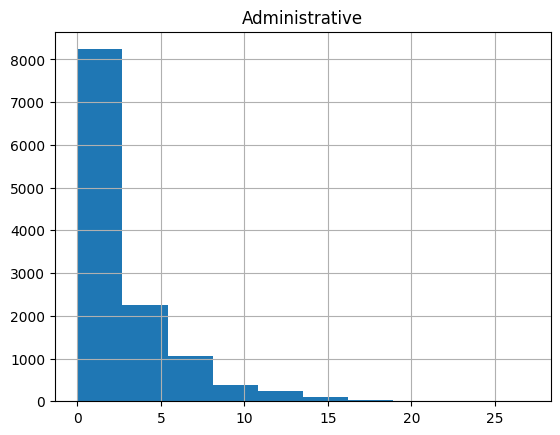

Text(0.5, 1.0, 'Administrative_Duration')

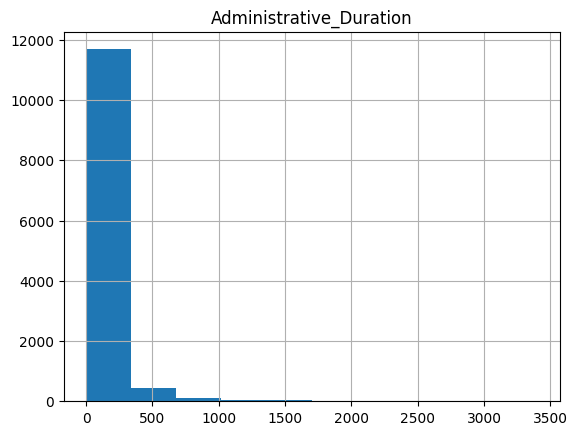

In [ ]:
df['Administrative'].hist()
plt.title('Administrative')
plt.show()
df['Administrative_Duration'].hist()
plt.title('Administrative_Duration')

In [ ]:
print('Administrative > 15 количество строк:', len(df[df['Administrative']> 15]))
df[df['Administrative']> 15].sort_values(by='Administrative', ascending = True).tail(10)

Administrative > 15 количество строк: 75


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4509,22,1951.279141,1,99.000000,55,3373.015865,0.016438,0.038293,8.508238,0.0,May,2,2,3,1,Returning_Visitor,False,False
7504,23,335.130952,5,399.800000,88,1839.098106,0.015759,0.031588,0.000000,0.0,Aug,3,2,3,2,Returning_Visitor,True,False
7828,23,239.744534,3,624.600000,409,9100.402959,0.004301,0.015935,6.277684,0.0,Jul,2,2,1,13,Returning_Visitor,True,False
9078,23,322.941667,0,0.000000,62,3142.941176,0.003038,0.019685,7.311892,0.0,Nov,2,2,1,10,Returning_Visitor,True,False
4937,24,290.860369,6,529.700000,178,4339.534423,0.003939,0.015263,6.149344,0.4,May,2,2,3,4,Returning_Visitor,False,False
5597,24,468.100663,6,191.866667,189,3428.527381,0.018642,0.043831,0.870148,0.0,June,2,2,2,1,Returning_Visitor,False,False
2599,24,196.138592,1,28.000000,113,8699.407065,0.019308,0.047477,2.613453,0.0,May,2,2,6,11,Returning_Visitor,True,False
1509,24,876.233333,5,625.500000,34,1588.666667,0.000000,0.013801,0.000000,0.0,Mar,2,2,5,2,Returning_Visitor,False,False
12178,26,1561.717567,9,503.722222,183,9676.093180,0.011055,0.014200,19.567464,0.0,Nov,3,2,2,13,Returning_Visitor,False,True
8308,27,853.735949,2,126.500000,584,24844.156200,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False


In [ ]:
print('Administrative_Duration > 1000 количество строк:', len(df[df['Administrative_Duration']> 1000]))
df[df['Administrative_Duration']> 1000].sort_values(by='Administrative_Duration', ascending = True).tail(10)

Administrative_Duration > 1000 количество строк: 86


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4509,22,1951.279141,1,99.000000,55,3373.015865,0.016438,0.038293,8.508238,0.0,May,2,2,3,1,Returning_Visitor,False,False
1572,11,2047.234848,9,1146.666667,45,3641.213151,0.002637,0.014311,7.753880,0.0,Mar,2,2,1,2,Returning_Visitor,False,True
9736,8,2086.750000,1,46.500000,81,5546.000000,0.002326,0.014563,15.564622,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
11712,14,2137.112745,0,0.000000,53,4223.409838,0.008772,0.017126,8.886649,0.0,Nov,3,2,2,2,Returning_Visitor,False,False
4884,5,2156.166667,2,92.000000,15,463.000000,0.036364,0.042208,0.000000,0.0,May,1,2,4,4,Returning_Visitor,True,False
6165,10,2407.423810,3,434.300000,486,23050.104140,0.000324,0.011249,0.000000,0.0,Jul,2,2,1,3,Returning_Visitor,False,False
5152,17,2629.253968,24,2050.433333,705,43171.233380,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
9238,15,2657.318056,13,1949.166667,343,29970.465970,0.005316,0.028971,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
5776,7,2720.500000,3,353.400000,68,5943.547619,0.032237,0.038623,0.000000,0.0,Jul,3,2,1,13,Returning_Visitor,False,False
8071,5,3398.750000,6,2549.375000,449,63973.522230,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


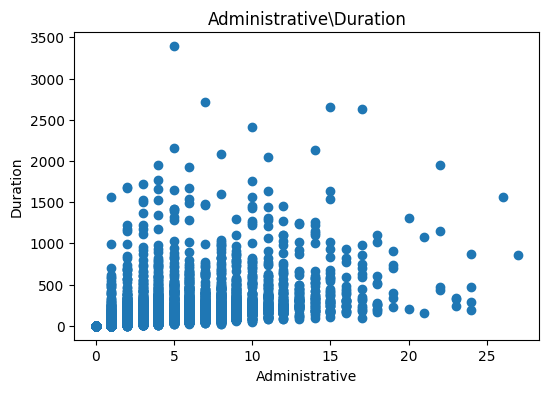

In [ ]:
# посмотрим на зависимость между PAdministrative и Administrative_Duration
plt.figure(figsize=(6,4))

plt.scatter(df['Administrative'], df['Administrative_Duration'])
plt.title('Administrative\Duration')
plt.xlabel('Administrative')
plt.ylabel('Duration');

Сотношение ненулевых Administrative к общему RevenueSum, % 73.06079664570231


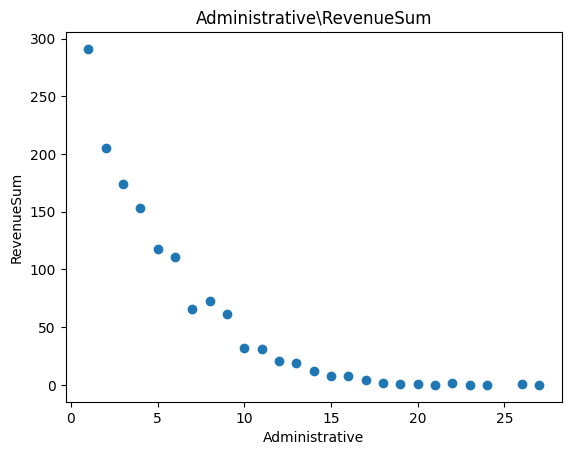

Сотношение ненулевых Administrative_Duration к общему RevenueSum, % 71.27882599580713


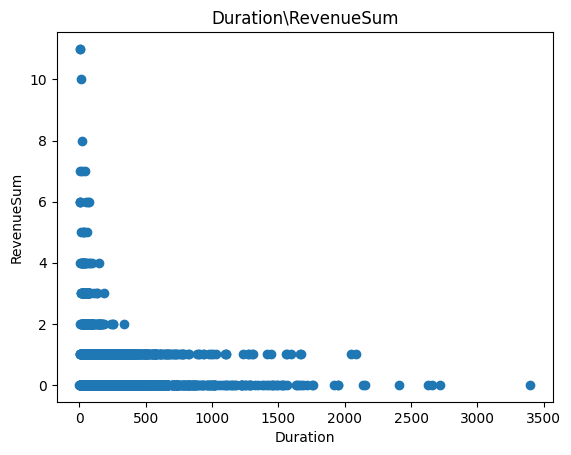

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от Administrative

df_ad = df.groupby('Administrative').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых Administrative к общему RevenueSum, %',
      df_ad.loc[df_ad['Administrative']!=0,'RevenueSum'].sum()/df_ad['RevenueSum'].sum()*100)

df_ad= df_ad[df_ad['Administrative']!=0]

plt.scatter(df_ad['Administrative'], df_ad['RevenueSum'])
plt.title('Administrative\RevenueSum')
plt.xlabel('Administrative')
plt.ylabel('RevenueSum');
plt.show()

df_ad_d = df.groupby('Administrative_Duration').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых Administrative_Duration к общему RevenueSum, %',
      df_ad_d.loc[df_ad_d['Administrative_Duration']!=0,'RevenueSum'].sum()/df_ad_d['RevenueSum'].sum()*100)

df_ad_d= df_ad_d[df_ad_d['Administrative_Duration']!=0]

plt.scatter(df_ad_d['Administrative_Duration'], df_ad_d['RevenueSum'])
plt.title('Duration\RevenueSum')
plt.xlabel('Duration')
plt.ylabel('RevenueSum');

предварительный вывод:
- распределение значений скошено влево
- связь между количеством просмотров и длительностью просмотров у страницы Administrative не прослеживается
- связь с целевой переменной похожа на квадратичную убывающую функцию,
просмотр этой страницы с последующей закупкой составил 70% от всех покупок

Informational Informational_Duration

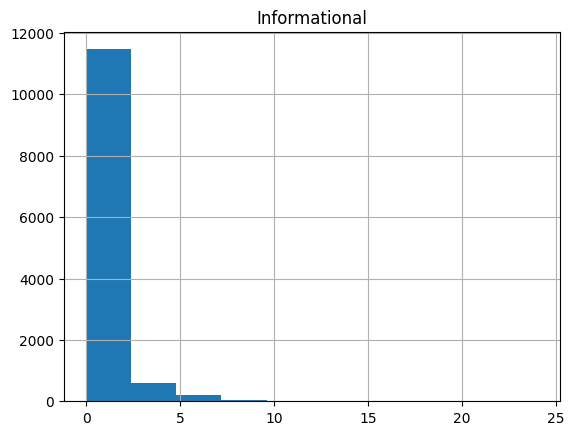

Text(0.5, 1.0, 'Duration')

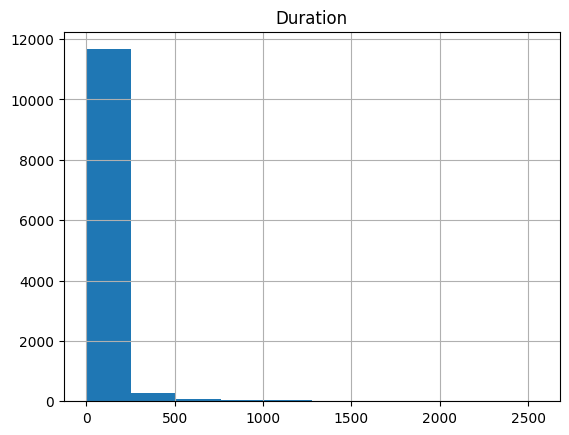

In [ ]:
df['Informational'].hist()
plt.title('Informational')
plt.show()
df['Informational_Duration'].hist()
plt.title('Duration')

In [ ]:
print('Informational > 10 количество строк:', len(df[df['Informational']> 10]))
df[df['Informational']> 10].sort_values(by='Informational', ascending = True).tail(10)

Informational > 10 количество строк: 11


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
610,6,176.250000,12,404.000000,41,2720.671429,0.012963,0.033262,8.833826,0.0,Mar,2,2,2,2,Returning_Visitor,True,True
4316,15,370.275000,12,689.833333,96,2964.590278,0.002609,NaN,3.358133,0.0,May,1,1,3,1,Returning_Visitor,False,True
4378,14,1261.916667,12,985.419048,30,1956.022222,0.003084,0.022907,0.000000,0.6,May,2,2,3,2,Returning_Visitor,False,False
8872,4,95.750000,12,886.250000,154,7838.556598,0.003765,0.014926,0.000000,0.0,Nov,3,2,6,2,Returning_Visitor,True,False
12131,10,297.833333,12,290.225000,33,1467.654221,0.008000,0.023038,13.203310,0.0,Dec,3,2,1,2,Returning_Visitor,True,False
9238,15,2657.318056,13,1949.166667,343,29970.465970,0.005316,0.028971,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
373,1,3.000000,14,1165.166667,81,2820.952419,0.008897,0.029431,0.000000,0.0,aug,2,2,3,2,Returning_Visitor,False,False
6757,12,430.157017,14,622.400000,85,3684.855282,0.000935,0.009960,34.459435,0.0,Nov,3,2,1,2,Returning_Visitor,True,False
184,0,0.000000,16,1210.397619,5,279.857143,0.003175,0.012764,0.000000,0.0,Mar,2,2,1,8,Returning_Visitor,False,False
5152,17,2629.253968,24,2050.433333,705,43171.233380,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False


In [ ]:
print('Informational_Duration > 1000 количество строк:', len(df[df['Informational_Duration']> 1000]))
df[df['Informational_Duration']> 1000].sort_values(by='Informational_Duration', ascending = True).tail(10)

Informational_Duration > 1000 количество строк: 63


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4253,3,270.000000,1,1778.000000,362,13259.293960,0.002883,0.008838,0.000000,0.0,May,2,2,1,19,Returning_Visitor,True,False
3574,0,0.000000,9,1779.166667,12,1886.500000,0.007018,0.019298,0.000000,0.6,May,2,2,6,3,New_Visitor,False,False
8846,0,0.000000,3,1830.500000,81,5000.739116,0.003294,0.020433,0.000000,0.0,Nov,2,2,3,2,Returning_Visitor,True,False
9238,15,2657.318056,13,1949.166667,343,29970.465970,0.005316,0.028971,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
5152,17,2629.253968,24,2050.433333,705,43171.233380,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
11470,8,145.100000,6,2166.500000,14,1805.425000,0.000000,0.031138,10.900234,0.0,Dec,4,5,1,2,Returning_Visitor,False,False
5512,3,28.800000,5,2195.300000,21,378.400000,0.029630,0.030864,0.000000,0.0,Jul,1,1,3,1,Returning_Visitor,False,False
6020,8,116.972222,9,2252.033333,19,1135.880556,0.009677,0.011842,0.000000,0.0,Jul,3,2,4,2,Returning_Visitor,True,False
10302,4,367.000000,5,2256.916667,74,8981.580128,0.002989,0.043302,0.000000,0.0,Dec,2,2,1,8,Returning_Visitor,False,False
8071,5,3398.750000,6,2549.375000,449,63973.522230,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


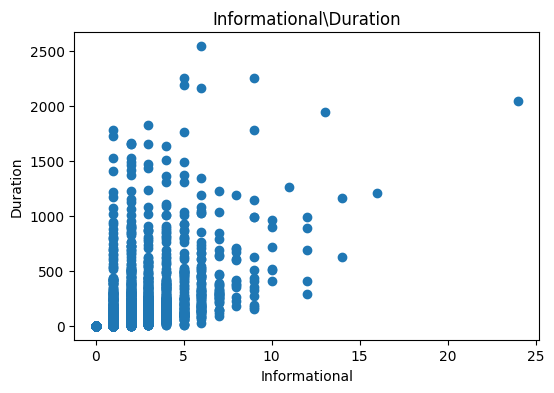

In [ ]:
# посмотрим на зависимость между PAdministrative и Administrative_Duration
plt.figure(figsize=(6,4))

plt.scatter(df['Informational'], df['Informational_Duration'])
plt.title('Informational\Duration')
plt.xlabel('Informational')
plt.ylabel('Duration');

Сотношение ненулевых Informational к общему RevenueSum, % 32.127882599580715


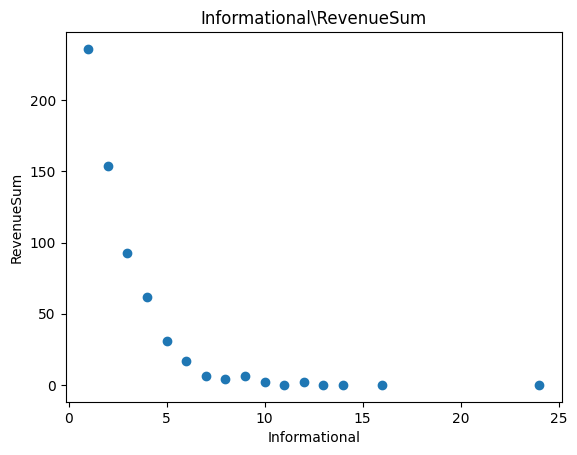

Сотношение ненулевых Informational_Duration к общему RevenueSum, % 29.615795090715046


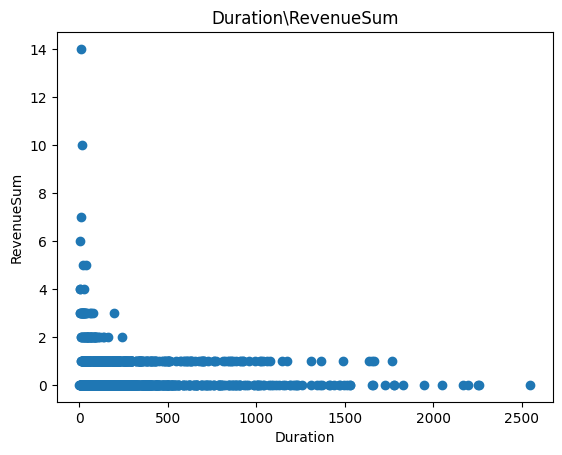

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от ProductRelated

df_in = df.groupby('Informational').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых Informational к общему RevenueSum, %',
      df_in.loc[df_in['Informational']!=0, 'RevenueSum'].sum()/df_in['RevenueSum'].sum()*100)

df_in= df_in[df_in['Informational']!=0]

plt.scatter(df_in['Informational'], df_in['RevenueSum'])
plt.title('Informational\RevenueSum')
plt.xlabel('Informational')
plt.ylabel('RevenueSum');
plt.show()

df_in_d = df.groupby('Informational_Duration').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых Informational_Duration к общему RevenueSum, %',
      df_in_d.loc[df_in_d['Informational_Duration']!=0,'RevenueSum'].sum()/df_in_d['RevenueSum'].sum()*100)

df_in_d= df_in_d[df_in_d['Informational_Duration']!=0]

plt.scatter(df_in_d['Informational_Duration'], df_in_d['RevenueSum'])
plt.title('Duration\RevenueSum')
plt.xlabel('Duration')
plt.ylabel('RevenueSum');

предварительный вывод:
- распределение значений скошено влево
- связь между количеством просмотров и длительностью просмотров у страницы Informational не прослеживается
- связь с целевой переменной похожа на квадратичную убывающую функцию,
просмотр этой страницы с последующей закупкой составил около 30% от всех покупок

ProductRelated ProductRelated_Duration

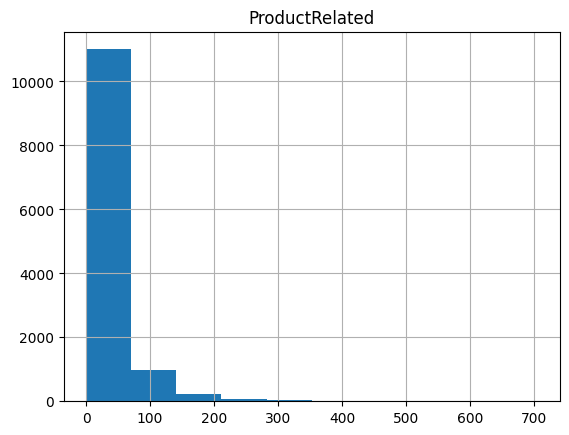

Text(0.5, 1.0, 'Duration')

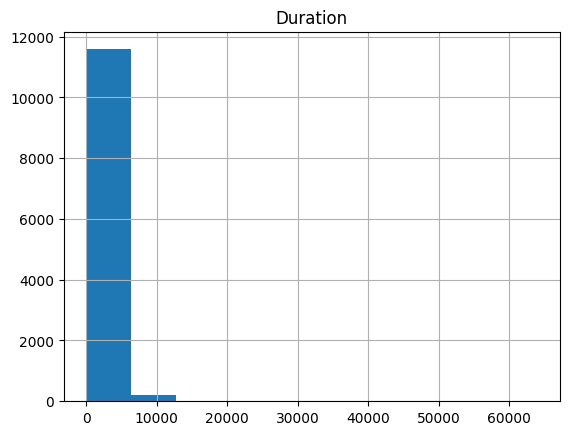

In [ ]:
df['ProductRelated'].hist()
plt.title('ProductRelated')
plt.show()
df['ProductRelated_Duration'].hist()
plt.title('Duration')

In [ ]:
print('ProductRelated > 400 количество строк:', len(df[df['ProductRelated']> 400]))
df[df['ProductRelated']> 400].sort_values(by='ProductRelated', ascending = True).tail(10)

ProductRelated > 400 количество строк: 19


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
10350,5,613.500000,0,0.000000,470,14129.88080,0.000000,0.003621,13.381494,0.0,Nov,4,2,9,2,Returning_Visitor,True,True
6165,10,2407.423810,3,434.300000,486,23050.10414,0.000324,0.011249,0.000000,0.0,Jul,2,2,1,3,Returning_Visitor,False,False
8972,11,631.416667,5,1037.150000,501,21672.24425,0.003965,0.014292,9.131387,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
8784,20,1307.675000,3,132.666667,517,27009.85943,0.004385,0.014594,8.403164,0.0,Nov,1,1,1,2,Returning_Visitor,False,True
6787,8,161.668571,0,0.000000,518,11976.72135,0.000038,0.003837,0.000000,0.0,Oct,4,2,9,2,Returning_Visitor,False,False
10318,9,444.284722,0,0.000000,534,18504.12621,0.010857,0.023309,2.547956,0.0,Nov,2,2,3,2,Returning_Visitor,True,True
8308,27,853.735949,2,126.500000,584,24844.15620,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False
6684,20,199.456273,7,299.033333,686,23342.08205,0.009853,0.022771,0.150650,0.0,Aug,2,2,1,1,Returning_Visitor,False,False
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False


In [ ]:
print('ProductRelated_Duration > 11000 количество строк:', len(df[df['ProductRelated_Duration']> 11000]))
df[df['ProductRelated_Duration']> 11000].sort_values(by='ProductRelated_Duration', ascending = True).tail(10)

ProductRelated_Duration > 11000 количество строк: 63


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
10318,9,444.284722,0,0.000000,534,18504.12621,0.010857,0.023309,2.547956,0.0,Nov,2,2,3,2,Returning_Visitor,True,True
8972,11,631.416667,5,1037.150000,501,21672.24425,0.003965,0.014292,9.131387,0.0,Nov,2,2,1,2,Returning_Visitor,False,True
6165,10,2407.423810,3,434.300000,486,23050.10414,0.000324,0.011249,0.000000,0.0,Jul,2,2,1,3,Returning_Visitor,False,False
6684,20,199.456273,7,299.033333,686,23342.08205,0.009853,0.022771,0.150650,0.0,Aug,2,2,1,1,Returning_Visitor,False,False
7662,10,1251.200000,7,250.000000,414,23888.81000,0.009900,0.027062,1.033757,0.0,Sep,2,2,4,13,Returning_Visitor,False,False
8308,27,853.735949,2,126.500000,584,24844.15620,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False
8784,20,1307.675000,3,132.666667,517,27009.85943,0.004385,0.014594,8.403164,0.0,Nov,1,1,1,2,Returning_Visitor,False,True
9238,15,2657.318056,13,1949.166667,343,29970.46597,0.005316,0.028971,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False
5152,17,2629.253968,24,2050.433333,705,43171.23338,0.004851,0.015431,0.763829,0.0,May,2,2,1,14,Returning_Visitor,True,False
8071,5,3398.750000,6,2549.375000,449,63973.52223,0.000764,0.027701,0.000000,0.0,Dec,2,2,1,2,Returning_Visitor,False,False


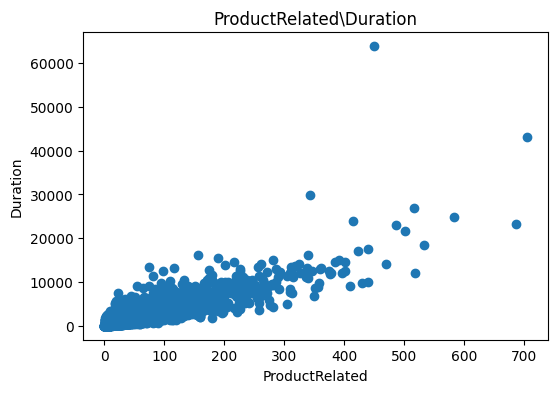

In [ ]:
# посмотрим на зависимость между ProductRelated и ProductRelated_Duration
plt.figure(figsize=(6,4))

plt.scatter(df['ProductRelated'], df['ProductRelated_Duration'])
plt.title('ProductRelated\Duration')
plt.xlabel('ProductRelated')
plt.ylabel('Duration');

Сотношение ненулевых ProductRelated к общему RevenueSum, % 99.68553459119497


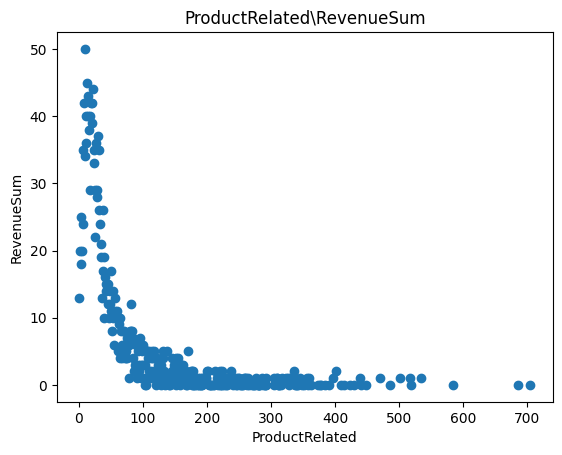

Сотношение ненулевых ProductRelated_Duration к общему RevenueSum, % 99.34102141680395


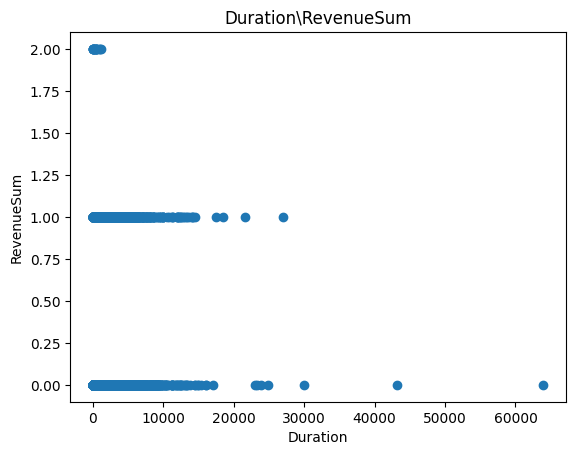

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от ProductRelated

df_pr = df.groupby('ProductRelated').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых ProductRelated к общему RevenueSum, %',
      df_pr.loc[df_pr['ProductRelated']!=0, 'RevenueSum'].sum()/df_pr['RevenueSum'].sum()*100)

df_pr= df_pr[df_pr['ProductRelated']!=0]

plt.scatter(df_pr['ProductRelated'], df_pr['RevenueSum'])
plt.title('ProductRelated\RevenueSum')
plt.xlabel('ProductRelated')
plt.ylabel('RevenueSum');
plt.show()

df_pr_d = df.groupby('ProductRelated_Duration').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых ProductRelated_Duration к общему RevenueSum, %',
      df_pr_d.loc[df_pr_d['ProductRelated_Duration']!=0, 'RevenueSum'].sum()/df_pr_d['RevenueSum'].sum()*100)

df_pr_d= df_pr_d[df_pr_d['ProductRelated_Duration']!=0]

plt.scatter(df_pr_d['ProductRelated_Duration'], df_pr_d['RevenueSum'])
plt.title('Duration\RevenueSum')
plt.xlabel('Duration')
plt.ylabel('RevenueSum');

предварительный вывод:
- распределение значений скошено влево
- связь между количеством просмотров и длительностью просмотров у страницы ProductRealated похожа на квадратичную возрастающую функцию
- связь с целевой переменной похожа на квадратичную убывающую функцию
почти все просмотры этой страницы сопровождались покупкой

 **Bounce Rate** характеристика веб-страницы относится к проценту посетителей, которые заходят на сайт с этой страницы, а затем покидают его (Bounce, "отскакивают"), не вызывая никаких других запросов к серверу аналитики в течение этого сеанса. (metrics measured by "Google Analytics"). Это число сеансов, в ходе которых пользователи посмотрели только определенную страницу, разделенное на общее количество сеансов, начавшихся с просмотра этой страницы. При расчете показателя отказов для страницы учитываются только те сеансы, которые начались с ее просмотра.  
  **Exit Rate** это процент просмотров определенной страницы, которые оказались последними в сеансе

 подробнее про разницу https://support.google.com/analytics/answer/2525491?hl=ru

 НЕ ПОНИМАЮ СМЫСЛ ЭТОЙ МЕТРИКИ, видимо она тут суммарная для всех страниц если нельзя посмотреть с какой именно страницы начали-закончили, зачем она? понятно что всегда с какой-то страницы начинают, с какой-то уходят. Имхо важно понимать что это за страница?


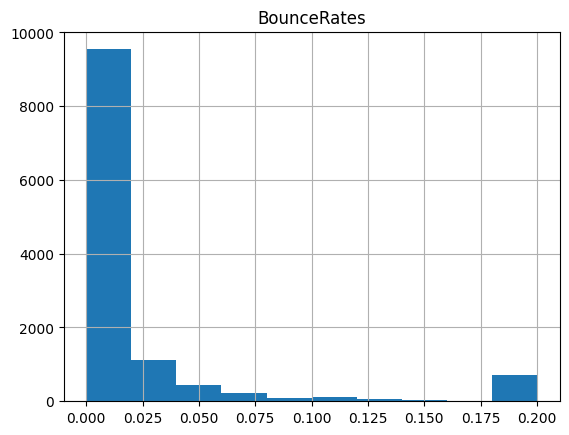

Text(0.5, 1.0, 'ExitRates')

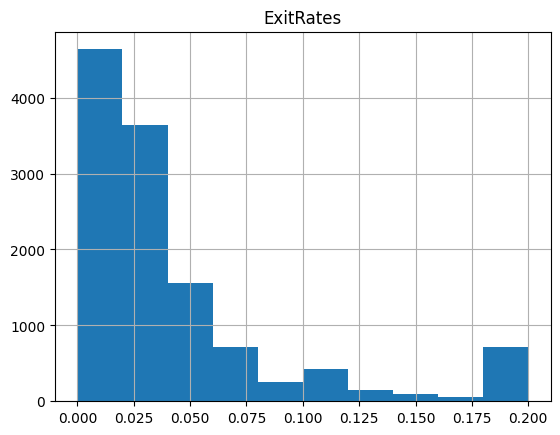

In [ ]:
df['BounceRates'].hist()
plt.title('BounceRates')
plt.show()
df['ExitRates'].hist()
plt.title('ExitRates')


In [ ]:
print('BounceRates > 0.15 количество строк:', len(df[df['BounceRates']> 0.15]))
df[df['BounceRates']> 0.15].sort_values(by='BounceRates', ascending = True).tail(10)

BounceRates > 0.15 количество строк: 721


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2843,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,3,2,7,1,Returning_Visitor,False,False
2861,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,2,2,1,3,Returning_Visitor,False,False
2896,0,0.0,0,0.0,5,0.0,0.2,0.2,0.0,0.4,May,3,2,4,13,Returning_Visitor,False,False
2918,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,4,2,New_Visitor,False,False
2928,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,May,2,4,6,6,Returning_Visitor,False,False
2948,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,3,3,Returning_Visitor,False,False
2979,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,6,4,Returning_Visitor,True,False
3004,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,May,2,2,6,6,Returning_Visitor,False,False
3438,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.6,May,3,2,3,13,Returning_Visitor,False,False
12321,0,0.0,0,0.0,6,0.0,0.2,0.2,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,False,False


In [ ]:
print('ExitRates > 0.16 количество строк:', len(df[df['ExitRates']> 0.16]))
df[df['ExitRates']> 0.16].sort_values(by='ExitRates', ascending = True).tail(10)

ExitRates > 0.16 количество строк: 761


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2918,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,4,2,New_Visitor,False,False
2928,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.4,May,2,4,6,6,Returning_Visitor,False,False
2948,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,3,3,Returning_Visitor,False,False
2979,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,6,4,Returning_Visitor,True,False
2991,0,0.0,0,0.0,1,0.0,0.0,0.2,0.0,0.2,May,2,2,6,1,Returning_Visitor,False,False
3004,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.0,May,2,2,6,6,Returning_Visitor,False,False
3048,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,2,10,3,4,Returning_Visitor,True,False
3069,0,0.0,0,0.0,2,0.0,0.2,0.2,0.0,0.8,May,3,2,3,3,Returning_Visitor,False,False
3137,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,May,1,1,3,15,Returning_Visitor,False,False
12321,0,0.0,0,0.0,6,0.0,0.2,0.2,0.0,0.0,Nov,1,8,4,1,Returning_Visitor,False,False


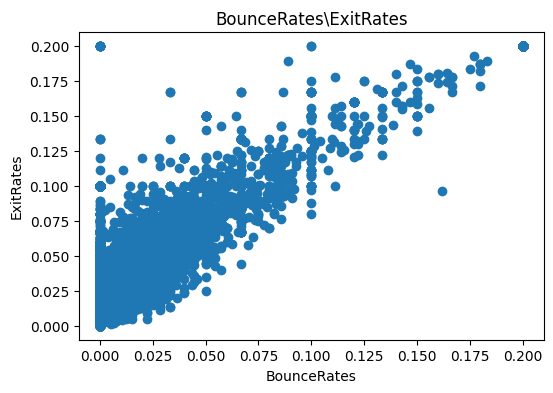

In [ ]:
# посмотрим на зависимость между BounceRates и ExitRates
plt.figure(figsize=(6,4))

plt.scatter(df['BounceRates'], df['ExitRates'])
plt.title('BounceRates\ExitRates')
plt.xlabel('BounceRates')
plt.ylabel('ExitRates');

Сотношение ненулевых BounceRates к общему RevenueSum, % 45.70230607966457


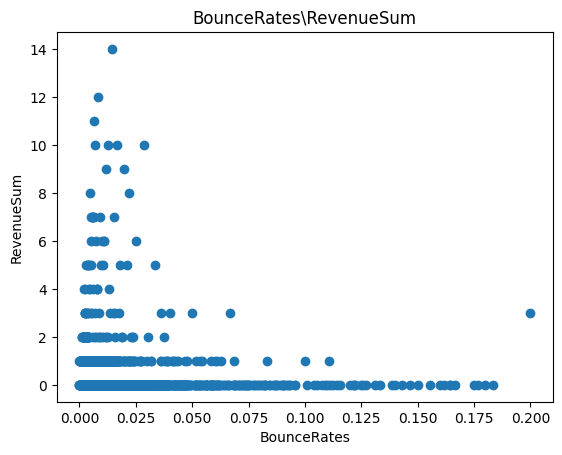

Сотношение ненулевых ExitRates к общему RevenueSum, % 98.25026511134676


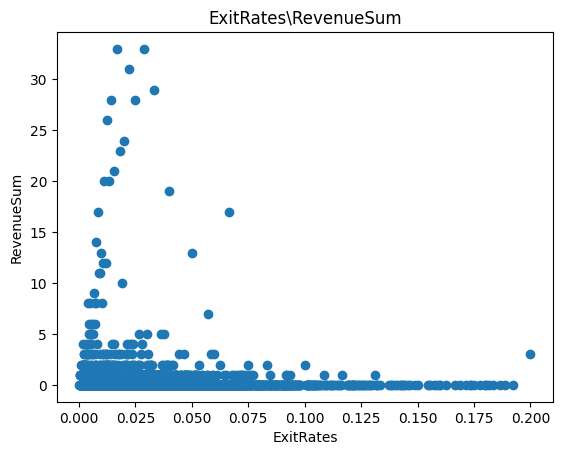

In [5]:
# посмотрим на распределение значений Revenue в зависимости от BounceRates и ExitRates

df_br = df.groupby('BounceRates').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых BounceRates к общему RevenueSum, %',
      df_br.loc[df_br['BounceRates']!=0, 'RevenueSum'].sum()/df_br['RevenueSum'].sum()*100)

df_br= df_br[df_br['BounceRates']!=0]

plt.scatter(df_br['BounceRates'], df_br['RevenueSum'])
plt.title('BounceRates\RevenueSum')
plt.xlabel('BounceRates')
plt.ylabel('RevenueSum');
plt.show()

df_er = df.groupby('ExitRates').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=False).reset_index()

print('Сотношение ненулевых ExitRates к общему RevenueSum, %',
      df_er.loc[df_er['ExitRates']!=0, 'RevenueSum'].sum()/df_er['RevenueSum'].sum()*100)

df_er= df_er[df_er['ExitRates']!=0]

plt.scatter(df_er['ExitRates'], df_er['RevenueSum'])
plt.title('ExitRates\RevenueSum')
plt.xlabel('ExitRates')
plt.ylabel('RevenueSum');
plt.show()



предварительный вывод:
- распределение значений скошено влево и имеет второй максимум у обоих параметров
- наблюдается линейная зависимость между BounceRates и ExitRates
- связь с целевой переменной неоднородна, для BounceRates меньше половины закончились продажей (возможно, целенаправленно шли за покупкой)

In [9]:
df.loc[df['BounceRates']!=0].groupby('VisitorType')['VisitorType'].count()

VisitorType
New_Visitor           231
Other                  19
Returning_Visitor    6562
Name: VisitorType, dtype: int64

**Page Value** представляет среднее значение для веб-страницы, которую пользователь посетил перед завершением транзакции электронной коммерции.
подробнее вот тут https://yoast.com/what-is-page-value-in-google-analytics/

<Axes: >

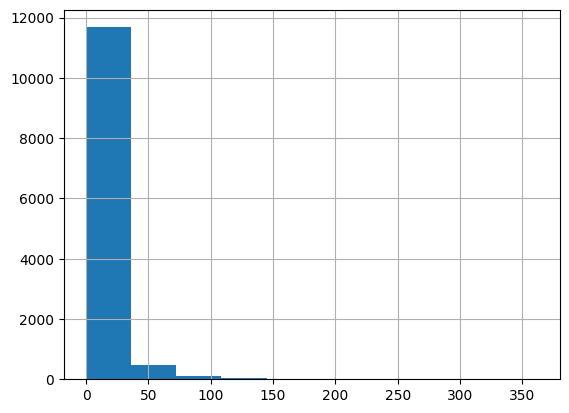

In [ ]:
df['PageValues'].hist()

In [ ]:
df[df['PageValues']>150]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
200,1,32.000000,0,0.000000,50,2867.000000,0.000000,0.004000,153.443248,0.0,Mar,2,2,7,8,Returning_Visitor,True,True
1491,5,172.200000,0,0.000000,23,792.722222,0.000000,0.010714,261.491286,0.0,Mar,2,2,1,8,New_Visitor,False,True
2659,2,77.000000,0,0.000000,32,1223.416667,0.000000,0.010784,215.009412,0.0,May,3,2,4,2,Returning_Visitor,False,True
3110,0,0.000000,0,0.000000,13,303.400000,0.000000,0.016667,239.980000,0.0,May,2,2,5,2,Returning_Visitor,False,True
3340,1,6.000000,1,7.000000,25,591.892857,0.000000,0.020833,165.620467,0.0,May,1,1,8,4,Returning_Visitor,True,True
3529,4,47.500000,0,0.000000,16,331.333333,0.000000,0.010526,254.607158,0.0,May,2,5,1,2,New_Visitor,False,True
4069,0,0.000000,0,0.000000,50,1232.026840,0.000000,0.001667,173.469792,0.0,May,2,2,9,2,New_Visitor,False,True
5464,3,89.600000,0,NaN,57,1721.906667,0.000000,0.005932,204.007949,0.0,Nov,2,2,1,4,Returning_Visitor,True,True
5773,4,158.200000,0,0.000000,62,NaN,0.000000,0.001042,246.758590,0.0,Oct,4,1,8,2,New_Visitor,False,False
6110,0,0.000000,2,101.700000,42,1892.198319,0.000000,0.004545,153.577697,0.0,Aug,2,2,1,1,Returning_Visitor,False,True


In [ ]:
# посмотрим на распределение значений Revenue в зависимости от PageValues и разных страниц

df_pv = df[df['PageValues']>0].groupby('PageValues').agg(RevenueCount = ('Revenue','count'),
                                                          RevenueSum = ('Revenue','sum'),
                                                                   Administrative_D = ('Administrative_Duration','sum'),
                                                                   Informational_D = ('Informational_Duration','sum'),
                                                                   ProductRelated_D = ('ProductRelated_Duration','sum')).sort_values(by = 'PageValues', ascending=False).reset_index()
df_pv.head(10)

,PageValues,RevenueCount,RevenueSum,Administrative_D,Informational_D,ProductRelated_D
0,361.763742,1,1,37.5,0.0,607.500000
1,360.953384,1,1,0.0,0.0,784.883333
2,287.953793,1,1,0.0,0.0,366.500000
3,270.784693,1,1,0.0,0.0,432.000000
4,261.491286,1,1,172.2,0.0,792.722222
5,258.549873,1,1,59.4,0.0,891.568795
6,255.569158,1,1,27.5,0.0,1403.720238
7,254.607158,1,1,47.5,0.0,331.333333
8,246.758590,1,0,158.2,0.0,0.000000
9,239.980000,1,1,0.0,0.0,303.400000


Сотношение ненулевых PageValues к общему RevenueSum, % 100.0


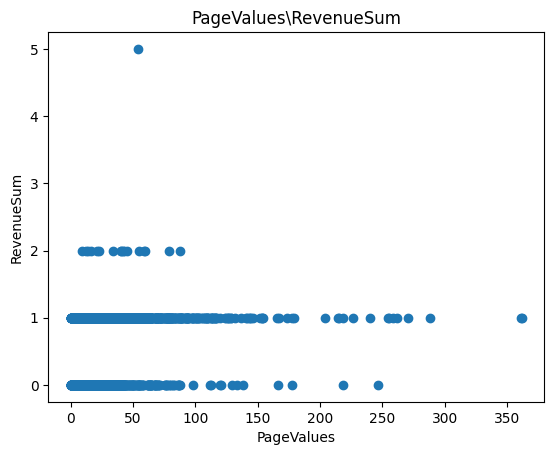

In [ ]:

print('Сотношение ненулевых PageValues к общему RevenueSum, %',
      df_pv.loc[df_pv['PageValues']!=0, 'RevenueSum'].sum()/df_pv['RevenueSum'].sum()*100)

df_pv= df_pv[df_pv['PageValues']!=0]

plt.scatter(df_pv['PageValues'], df_pv['RevenueSum'])
plt.title('PageValues\RevenueSum')
plt.xlabel('PageValues')
plt.ylabel('RevenueSum');
plt.show()

предварительный вывод:
- распределение значений скошено влево
- ожидаемо прямая зависимость с Revenue
- ожидаемо высокие значения PageValues соотносятся с высоким временем просмотров страницы ProductRelated

**Special Day**  указывает на близость времени посещения сайта к определенному особому дню (например, Дню матери, Дню Святого Валентина), в который сеансы с большей вероятностью завершатся транзакцией. Значение этого атрибута определяется с учетом динамики электронной коммерции, такой как промежуток времени между датой заказа и датой доставки. Например, для дня Святого Валентина это значение принимает ненулевое значение в период со 2 по 12 февраля, ноль до и после этой даты, если только она не близка к другому особому дню, и его максимальное значение равно 1 8 февраля.

<Axes: >

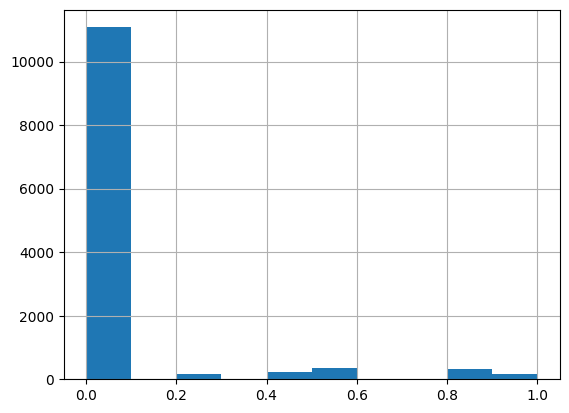

In [ ]:
df['SpecialDay'].hist()

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от SpecialDay

df_sd = df.groupby('SpecialDay').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_sd['Revenue_%'] = (df_sd['RevenueSum']/df_sd['RevenueCount']*100).apply(lambda x: round(x))
df_sd

,RevenueSum,RevenueCount,Revenue_%
SpecialDay,,,
1.0,10,154,6
0.8,11,325,3
0.4,13,243,5
0.2,14,178,8
0.6,29,351,8
0.0,1831,11079,17


предварительный вывод:
- распределение значений неравномерно
- конверсия и просмотры выше в дни предшествующие праздничным, но она составляет максимум 8%

Month

<Axes: >

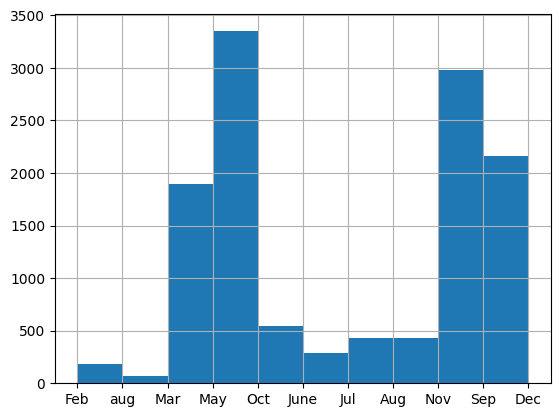

In [ ]:
df['Month'].hist()

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от Month

df_mt = df.groupby('Month').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count'),
                             Weekend = ('Weekend','sum'),
                             SpecialDay =  ('SpecialDay','sum')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_mt['Revenue_%'] = (df_mt['RevenueSum']/df_mt['RevenueCount']*100).apply(lambda x: round(x))
df_mt

,RevenueSum,RevenueCount,Weekend,SpecialDay,Revenue_%
Month,,,,,
Feb,3,183,28,42.6,2
aug,17,70,19,4.4,24
June,29,288,47,0.0,10
Jul,64,429,102,0.0,15
Aug,75,431,96,0.0,17
Sep,86,446,95,0.0,19
Oct,115,545,143,0.0,21
Mar,190,1897,478,0.0,10
Dec,213,1713,360,0.0,12


- распределение не равномерное
- самое большое количество продаж и конверсия 25% в ноябре, при этом связи с SpecialDay не прослеживается, а с выходными(Weekend) есть

Operating System

<Axes: >

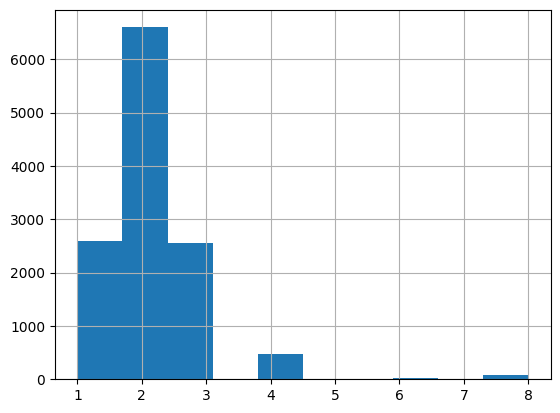

In [ ]:
df['OperatingSystems'].hist()

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от OperatingSystems

df_os = df.groupby('OperatingSystems').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_os['Revenue_%'] = (df_os['RevenueSum']/df_os['RevenueCount']*100).apply(lambda x: round(x))
df_os

,RevenueSum,RevenueCount,Revenue_%
OperatingSystems,,,
5,1,6,17
7,1,7,14
6,2,19,11
8,17,79,22
4,85,478,18
3,268,2555,10
1,379,2585,15
2,1155,6601,17


- распределение неравномерное (категориальные значения)
- есть топ три по операционной системе с несомненным лидером

Browser

<Axes: >

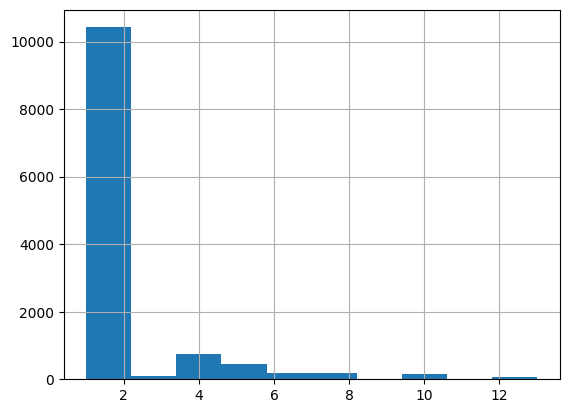

In [ ]:
df['Browser'].hist()

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от Browser

df_br = df.groupby('Browser').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_br['Revenue_%'] = (df_br['RevenueSum']/df_br['RevenueCount']*100).apply(lambda x: round(x))
df_br

,RevenueSum,RevenueCount,Revenue_%
Browser,,,
9,0,1,0
11,1,6,17
12,3,10,30
3,5,105,5
7,6,49,12
13,16,61,26
6,20,174,11
8,21,135,16
10,32,163,20


- распределение не равномерное(категориальные значения)
- есть явный лидер среди браузеров, конверсия у топ три 15-18%,
у остальных общее количество небольшое и высокая конверсия может быть случайной

Region

<Axes: >

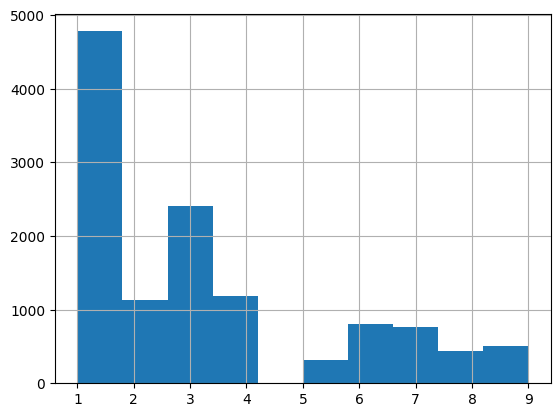

In [ ]:
df['Region'].hist()

In [ ]:
df['Region'].value_counts()

1    4780
3    2403
4    1182
2    1136
6     805
7     761
9     511
8     434
5     318
Name: Region, dtype: int64

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от Region

df_rg = df.groupby('Region').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_rg['Revenue_%'] = (df_rg['RevenueSum']/df_rg['RevenueCount']*100).apply(lambda x: round(x))
df_rg

,RevenueSum,RevenueCount,Revenue_%
Region,,,
5,52,318,16
8,56,434,13
9,86,511,17
6,112,805,14
7,119,761,16
4,175,1182,15
2,188,1136,17
3,349,2403,15
1,771,4780,16


- распределение значений не равномерное (категориальные значения)
- у всех регионов конверсия от 13 до 17 %, есть регионы с большим количеством посещений, скорее всего крупные города

TrafficType

<Axes: >

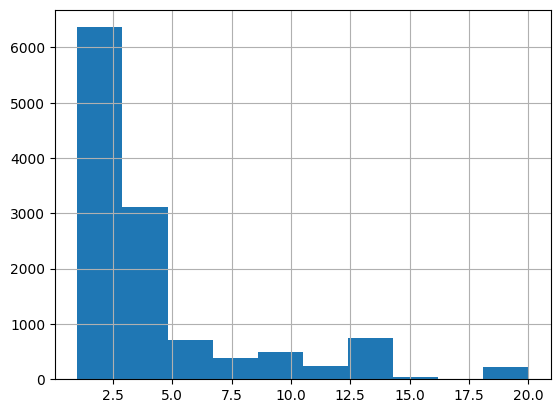

In [ ]:
df['TrafficType'].hist()

In [ ]:
df['TrafficType'].value_counts()

2     3913
1     2451
3     2052
4     1069
13     738
10     450
6      444
8      343
5      260
11     247
20     198
9       42
7       40
15      38
19      17
14      13
18      10
16       3
12       1
17       1
Name: TrafficType, dtype: int64

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от TrafficType

df_tt = df.groupby('TrafficType').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_tt['Revenue_%'] = (df_tt['RevenueSum']/df_tt['RevenueCount']*100).apply(lambda x: round(x))
df_tt

,RevenueSum,RevenueCount,Revenue_%
TrafficType,,,
18,0,10,0
17,0,1,0
15,0,38,0
12,0,1,0
16,1,3,33
19,1,17,6
14,2,13,15
9,4,42,10
7,12,40,30


- есть типы траффика которые вообще не привели к покупке, нужно посмотреть возможно есть проблемы с отображением сайта. Есть лидер по количеству посещений и конверсии 22%, имеет смысл посмотреть почему в других случаях при схожем количестве посещений конверсия 9-11%

VisitorType

<Axes: >

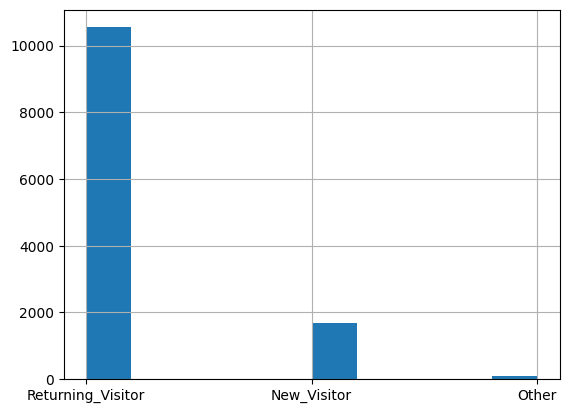

In [ ]:
df['VisitorType'].hist()

In [ ]:
# посмотрим на распределение значений Revenue в зависимости от VisitorType

df_vt = df.groupby('VisitorType').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_vt['Revenue_%'] = (df_vt['RevenueSum']/df_vt['RevenueCount']*100).apply(lambda x: round(x))
df_vt

,RevenueSum,RevenueCount,Revenue_%
VisitorType,,,
Other,16,85,19
New_Visitor,422,1694,25
Returning_Visitor,1470,10551,14


- у новых пользователей конверсия 25%, у повторных ниже почти в 2 раза. Но общие количество покупок у повторных посетителей почти в 3 р больше

In [ ]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [ ]:
df_we = df.groupby('Weekend').agg(RevenueSum = ('Revenue','sum'),
                             RevenueCount = ('Revenue','count')
                             ).sort_values(by = 'RevenueSum', ascending=True)

df_we['Revenue_%'] = (df_we['RevenueSum']/df_we['RevenueCount']*100).apply(lambda x: round(x))
df_we

,RevenueSum,RevenueCount,Revenue_%
Weekend,,,
True,499,2868,17
False,1409,9462,15


в выходные конверсия ожидаемо выше, но не намного.

Общий вывод:
- есть пропуски, есть неудобные форматы: object и bool, заменим их int для возможности использования в ML
(для столбцов Month, Weekend, Revenue, VisitorType)
- есть столбцы линейнозависимые между собой (BounceRates\ExitRates и ProductRelation\ProductRelation_Duration)
- все столбцы так или иначе влияют на Revenue, однозначного лидера кроме напрямую связанного PageValues выявить не удалось

## Задание 4 Целевая переменная
Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей?

In [ ]:
# рассмотрим соотношение значений у целевой переменной

df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Предварительные выводы
- у целевой переменной насбалансированные значения False\True, это может быть проблемой

In [11]:
# для дальнейших трансформаций создадим копию файла

df_copy = df.copy()

## пропуски, дубликаты, ошибочные значения

In [ ]:
df.isnull().mean() * 100

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     1.613950
ProductRelated             0.000000
ProductRelated_Duration    3.982157
BounceRates                0.000000
ExitRates                  0.802920
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [ ]:
df[df.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11827,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,2,2,1,1,Returning_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


- пропуски замечены в столбцах Informational_Duration , ProductRelated_Duration, ExitRates
везде меньше 5%, заменим на медианные значения
- дубликаты могут быть реальными одинаковыми значениями, оставлю как есть


In [12]:
df_copy['Informational_Duration'].fillna(df_copy['Informational_Duration'].median(), inplace=True)
df_copy['ProductRelated_Duration'].fillna(df_copy['ProductRelated_Duration'].median(), inplace=True)
df_copy['ExitRates'].fillna(df_copy['ExitRates'].median(), inplace=True)

In [13]:
df_copy.isnull().mean() * 100

Administrative             0.0
Administrative_Duration    0.0
Informational              0.0
Informational_Duration     0.0
ProductRelated             0.0
ProductRelated_Duration    0.0
BounceRates                0.0
ExitRates                  0.0
PageValues                 0.0
SpecialDay                 0.0
Month                      0.0
OperatingSystems           0.0
Browser                    0.0
Region                     0.0
TrafficType                0.0
VisitorType                0.0
Weekend                    0.0
Revenue                    0.0
dtype: float64

## замена значений

In [14]:
# начнем с Month
df['Month'].value_counts()

May     3348
Nov     2980
Mar     1897
Dec     1713
Oct      545
Sep      446
Aug      431
Jul      429
June     288
Feb      183
aug       70
Name: Month, dtype: int64

In [15]:
df['Month'].unique()

array(['Feb', 'aug', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov',
       'Sep', 'Dec'], dtype=object)

In [16]:
df['Month'].value_counts()

May     3348
Nov     2980
Mar     1897
Dec     1713
Oct      545
Sep      446
Aug      431
Jul      429
June     288
Feb      183
aug       70
Name: Month, dtype: int64

In [17]:
# заменим текстовые значения числовыми

df_copy['Month'].replace({'Feb': 2,'Mar': 3,
                         'May': 5,'June': 6,
                         'Jul': 7,'Aug': 8,
                         'aug': 8,
                         'Sep': 9,'Oct': 10,
                         'Nov': 11,'Dec': 12},inplace = True)

In [18]:
df_copy['Month'].value_counts()

5     3348
11    2980
3     1897
12    1713
10     545
8      501
9      446
7      429
6      288
2      183
Name: Month, dtype: int64

In [19]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [20]:
# заменим текстовые значения числовыми

df_copy['VisitorType'].replace({'Returning_Visitor': 1,
                         'New_Visitor': 2,
                         'Other': 3},inplace = True)

In [21]:
df['VisitorType'].value_counts()

Returning_Visitor    10551
New_Visitor           1694
Other                   85
Name: VisitorType, dtype: int64

In [22]:
df['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [23]:
# заменим текстовые значения числовыми

df_copy['Revenue'].replace({False: 0,
                             True: 1},inplace = True)

In [ ]:
df_copy['Revenue'].value_counts()

0    10422
1     1908
Name: Revenue, dtype: int64

In [ ]:
df['Weekend'].value_counts()

False    9462
True     2868
Name: Weekend, dtype: int64

In [24]:
# заменим булевые значения числовыми

df_copy['Weekend'].replace({False: 0,
                             True: 1},inplace = True)

In [ ]:
df_copy['Weekend'].value_counts()

0    9462
1    2868
Name: Weekend, dtype: int64

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  int64  
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
profile_report = ProfileReport(df_copy, title = 'Revenue Profiling Report')

In [ ]:
profile_report.to_file('revenue_report.html')

# Задание 3 Корреляции
Построить матрицу корреляций (или ее аналог для категориальных признаков): использовать корреляции, тест "хи квадрат", ANOVA .

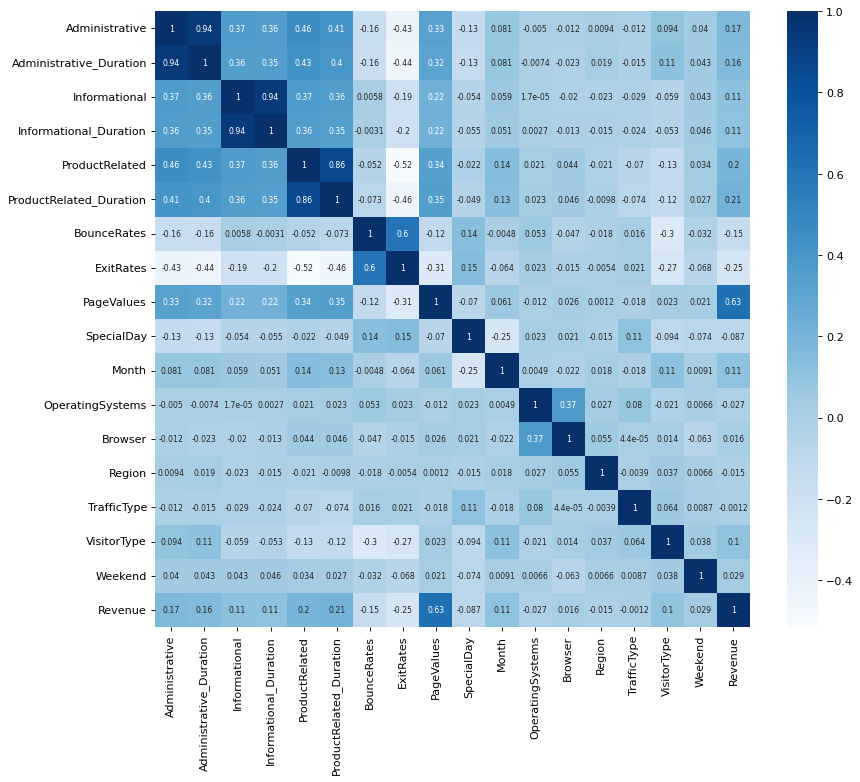

In [29]:
# Корреляция Пирсона

corr = df_copy.corr(method='spearman')
plt.figure(figsize = (12,10), dpi= 80)
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws = {'fontsize':7});

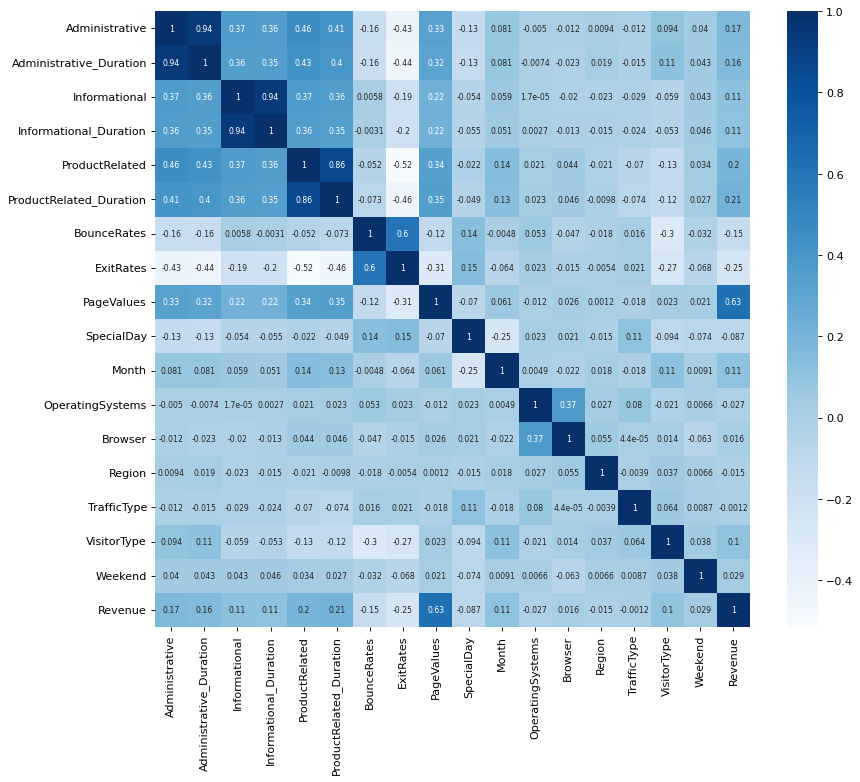

In [28]:
# Корреляция Cпирмана

corr = df_copy.corr(method='spearman')
plt.figure(figsize = (12,10), dpi= 80)
sns.heatmap(corr, cmap="Blues", annot=True, annot_kws = {'fontsize':7});

Предварительный вывод
- самую высокую корреляцию с целевым признаком дает **PageValues**
- есть внутрипризнаковая корреляция между страницами и временем их посещений (Administrative/Administrative_Duration, Informatial/Informatial_Duration, ProductRelated/ProductRelated_Duration) и уже замеченная ранее зависимость между ExitRates/BounceRates.
Так же OperationSystem\Browser показал корреляцию 0.37



In [ ]:
# ANOVA
# рассмотрим корреляции между категориальными признаком Month и PageValues

CategoryGroupLists_1 = df.groupby('Month')['PageValues'].apply(list)

In [ ]:
AnovaResults = f_oneway(*CategoryGroupLists_1)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  1.2386758421984863e-13
Features are correlated


In [ ]:
# рассмотрим корреляции между категориальными признаком VisitorType и PageValues

CategoryGroupLists_2 = df.groupby('VisitorType')['PageValues'].apply(list)

In [ ]:
AnovaResults = f_oneway(*CategoryGroupLists_2)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  1.0033303968830675e-39
Features are correlated


# Задание 5 Pandas и Polars
Увеличить размер данных простым дублированием до 1_000_000 строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам:
- загрузка данных
- фильтрация данных
- агрегация данных


In [32]:
df_big = df_copy.copy()

for i in range(80):
  df_big = pd.concat([df_big, df_copy])

df_big.to_csv("shoppers_big.csv", index=False)

In [33]:
print('размер датасета после увеличения:',df_big.shape)
print('размер датасета изначальный', df_copy.shape)

размер датасета после увеличения: (998730, 18)
размер датасета изначальный (12330, 18)


In [79]:
# сравним время загрузки датасета
%%time

df_pl = pl.read_csv("shoppers_big.csv")

CPU times: user 1.19 s, sys: 536 ms, total: 1.73 s
Wall time: 960 ms


In [80]:
%%time

df_pd = pd.read_csv("shoppers_big.csv")

CPU times: user 1.32 s, sys: 213 ms, total: 1.53 s
Wall time: 1.53 s


In [62]:
# фильтрация
%%time

df_pl.filter(pl.col('Revenue') == 1)

CPU times: user 38.6 ms, sys: 6.78 ms, total: 45.4 ms
Wall time: 48.2 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64
3,87.833333,0,0.0,27,798.333333,0.0,0.012644,22.916036,0.8,2,2,2,3,1,1,0,1
10,1005.666667,0,0.0,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,2,6,1,2,1,0,1
4,61.0,0,0.0,19,607.0,0.0,0.026984,17.535959,1.0,2,1,1,7,4,1,1,1
9,111.5,1,48.5,49,1868.819697,0.0,0.020709,1.706015,0.0,3,2,2,7,2,1,0,1
2,56.0,1,144.0,67,2563.783333,0.0,0.005797,19.34265,0.0,3,2,2,4,2,2,0,1
0,0.0,0,0.0,17,840.233333,0.0,0.001667,109.176,0.0,3,2,2,9,2,2,0,1
3,94.0,2,125.0,55,1970.844805,0.0,0.001724,96.255116,0.0,3,2,4,1,2,2,1,1
1,32.0,0,0.0,50,2867.0,0.0,0.004,153.443248,0.0,3,2,2,7,8,1,1,1
1,18.0,0,0.0,16,1331.75,0.0,0.0125,33.799567,0.0,3,2,5,2,3,2,0,1


In [61]:
%%time

df_pd[df_pd['Revenue'] == 1]

CPU times: user 46.1 ms, sys: 0 ns, total: 46.1 ms
Wall time: 52.1 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
65,3,87.833333,0,0.00,27,798.333333,0.000000,0.012644,22.916036,0.8,2,2,2,3,1,1,0,1
76,10,1005.666667,0,0.00,36,2111.341667,0.004348,0.014493,11.439412,0.0,2,2,6,1,2,1,0,1
101,4,61.000000,0,0.00,19,607.000000,0.000000,0.026984,17.535959,1.0,2,1,1,7,4,1,1,1
188,9,111.500000,1,48.50,49,1868.819697,0.000000,0.020709,1.706015,0.0,3,2,2,7,2,1,0,1
196,2,56.000000,1,144.00,67,2563.783333,0.000000,0.005797,19.342650,0.0,3,2,2,4,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998672,6,133.466667,0,0.00,44,2664.445833,0.002041,0.010884,97.860836,0.0,11,2,2,1,3,1,1,1
998676,7,139.575000,0,0.00,30,986.500000,0.000000,0.011429,36.392861,0.0,12,2,10,1,2,2,0,1
998711,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,11,2,2,1,2,1,0,1
998712,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,11,2,5,1,2,1,1,1


In [77]:
# аггрегация данных
%%time

df_pl.groupby('PageValues').agg([pl.count('Revenue'),
                                 pl.sum('Administrative_Duration'),
                                 pl.sum('Informational_Duration'),
                                 pl.sum('ProductRelated_Duration')])


CPU times: user 45.1 ms, sys: 857 µs, total: 46 ms
Wall time: 46.2 ms


PageValues,Revenue,Administrative_Duration,Informational_Duration,ProductRelated_Duration
f64,u32,f64,f64,f64
17.808,81,0.0,0.0,25274.699997
3.241653,81,0.0,0.0,110949.75
1.718219,81,0.0,0.0,38570.400002
2.427454,81,6370.634483,0.0,338992.832295
12.740393,81,24896.169639,6311.25,242172.257112
14.140507,81,3402.0,0.0,55252.799997
1.625051,81,14829.749997,3280.5,557263.947906
7.86895,81,8383.5,0.0,125567.099991
51.757758,81,4981.5,0.0,76929.75


In [78]:
%%time

df_pd.groupby('PageValues').agg(RevenueCount = ('Revenue','count'),
                                                       Administrative_D = ('Administrative_Duration','sum'),
                                                       Informational_D = ('Informational_Duration','sum'),
                                                       ProductRelated_D = ('ProductRelated_Duration','sum'))


CPU times: user 53.7 ms, sys: 781 µs, total: 54.4 ms
Wall time: 57.9 ms


,RevenueCount,Administrative_D,Informational_D,ProductRelated_D
PageValues,,,,
0.000000,777600,4.623252e+07,1.701243e+07,6.991905e+08
0.038035,81,1.589625e+04,3.758400e+03,9.956896e+05
0.067050,81,1.852863e+04,9.848250e+03,9.855022e+05
0.093547,81,2.038114e+04,3.564000e+03,1.838483e+05
0.098621,81,5.931900e+03,0.000000e+00,6.245692e+05
...,...,...,...,...
261.491286,81,1.394820e+04,0.000000e+00,6.421050e+04
270.784693,81,0.000000e+00,0.000000e+00,3.499200e+04
287.953793,81,0.000000e+00,0.000000e+00,2.968650e+04


In [64]:
#n = 10
#setup_pandas = "import pandas as pd"
#setup_polars = "import polars as pl"

#stmt_pandas_read = "df_pd = pd.read_csv('shoppers_big.csv')"
#stmt_polars_read = "df_pl = pl.read_csv('shoppers_big.csv')"




In [54]:
#time_pandas_read = timeit.timeit(stmt = stmt_pandas_read,setup = setup_pandas, number = n)

In [56]:
#time_polars_read = timeit.timeit(stmt = stmt_polars_read,setup = setup_polars, number = n)

Вывод
- Polars показал бОльшую скорость выполнения запросов при работе с данными размером около 100 000 000 строк.
- Хорошо заметна разница при чтении файла(в 1,5 раза) и при агрегации данных (в 1,2 раза)

# ML

In [ ]:
df_copy.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [ ]:
Y = df_copy['Revenue'] # целевая переменная
X = df_copy[['Administrative_Duration','Informational_Duration','ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
                    'OperatingSystems', 'Region', 'TrafficType', 'VisitorType',
                    'Weekend']] # матрица объект-признак


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = TEST_SIZE,random_state = RANDOM_STATE)

In [ ]:
#проверим размеры полученных выборок

print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("Y_train :",Y_train.shape)
print("Y_test :",Y_test.shape)

X_train : (9864, 13)
X_test : (2466, 13)
Y_train : (9864,)
Y_test : (2466,)


## полезные функции

In [ ]:
def aucroc_curve(predictions, predictions_one, a):
    print('F1-мера для',a,':', f1_score(Y_test,predictions))
    print('AUC-ROC',a,':', roc_auc_score(Y_test, predictions_one))
    print('матрица ошибок',a)
    print(confusion_matrix(Y_test,predictions))
    print("")
    fpr, tpr, thresholds = roc_curve(Y_test, predictions_one)
    plt.figure()
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show()

In [ ]:
def LgR_best(X,Y, class_weight):
    solvers=['newton-cg','lbfgs','liblinear']
    best_f1_LgR = 0.0
    best_model_LgR = None
    for s in solvers:
        for m in range(100,1000,100):
            model_LgR = LogisticRegression(random_state=12345, solver=s, max_iter=m,class_weight = class_weight)
            model_LgR.fit(X_train,Y_train)
            result_LgR = model_LgR.predict(X_train)
            f1_LgR = f1_score(Y_train,result_LgR)

            if f1_LgR > best_f1_LgR:
                best_f1_LgR = f1_LgR
                best_model_LgR = model_LgR
    return best_model_LgR, best_f1_LgR

In [ ]:
def RFC_best(features,target, class_weight):
    best_f1_RFC = 0
    best_model_RFC = None
    for e in range(1,100,10):
        for d in range(1,25):
            model_RFC = RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=e, max_depth = d,class_weight = class_weight)
            model_RFC.fit(X_train,Y_train)
            result_RFC = model_RFC.predict(X_test)
            f1_RFC = f1_score(Y_test, result_RFC)


            if f1_RFC > best_f1_RFC:
                best_f1_RFC = f1_RFC
                best_model_RFC = model_RFC

    return best_model_RFC, best_f1_RFC

In [ ]:
def DTC_best(X_train,Y_train, class_weight):
    splitter = ['best', 'random']
    criterion = ['gini','entropy']
    best_f1_DFC = 0
    best_model_DFC = None

    for s in splitter:
        for c in criterion:
            for d in range(1,15):
                model_DTC = DecisionTreeClassifier(random_state = RANDOM_STATE, criterion = c,splitter = s, max_depth = d,class_weight = class_weight)
                model_DTC.fit(X_train,Y_train)
                result = model_DTC.predict(X_test)
                f1_DFC = f1_score(Y_test, result)

                if f1_DFC > best_f1_DFC:
                    best_f1_DFC = f1_DFC
                    best_model_DFC = model_DTC

    return best_model_DFC, best_f1_DFC

## LinearRegression

In [ ]:
print("(best_model_LgR_standart), F1-мера LgR_standart : ", LgR_best(X_train,Y_train, None))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

(best_model_LgR_standart), F1-мера LgR_standart :  (LogisticRegression(max_iter=300, random_state=12345), 0.4859649122807017)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


F1-мера для LgR_standart : 0.5149501661129569
AUC-ROC LgR_standart : 0.8458276113741345
матрица ошибок LgR_standart
[[2019   43]
 [ 249  155]]



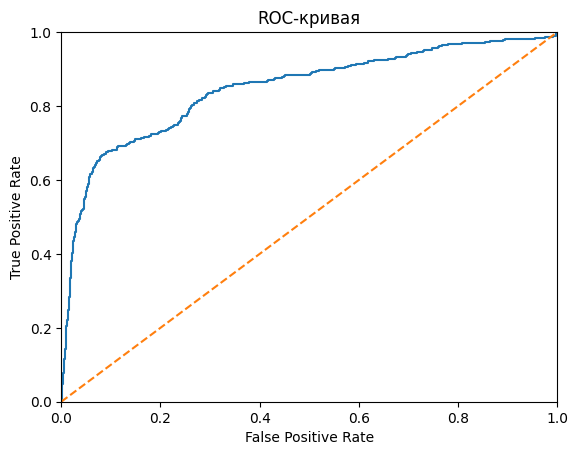

In [ ]:
#обучим модель, используя наилучшие параметры

model_LgR_st = LogisticRegression(random_state=RANDOM_STATE, max_iter=300)
model_LgR_st.fit(X_train,Y_train)
predictions_valid_LgR_st = model_LgR_st.predict(X_test)

predictions_one_valid_LgR_st =  model_LgR_st.predict_proba(X_test)[:,1]
# используем функцию aucroc_curve
aucroc_curve(predictions_valid_LgR_st, predictions_one_valid_LgR_st, 'LgR_standart')

LgR_st_ = (f1_score(Y_test,predictions_valid_LgR_st)).round(3)
LgR_st = (roc_auc_score(Y_test, predictions_one_valid_LgR_st)).round(3)

## RandomForestClassifier

In [ ]:
#RandomForestClassifier

print("(best_model_RFC_standart), F1-мера RFC_standart : ", RFC_best(X_train,Y_train, None))

(best_model_RFC_standart), F1-мера RFC_standart :  (RandomForestClassifier(max_depth=3, n_estimators=1, random_state=12345), 0.6815511163337251)


F1-мера для RFC_standart : 0.6815511163337251
AUC-ROC RFC_standart : 0.8989566027407785
матрица ошибок RFC_standart
[[1905  157]
 [ 114  290]]



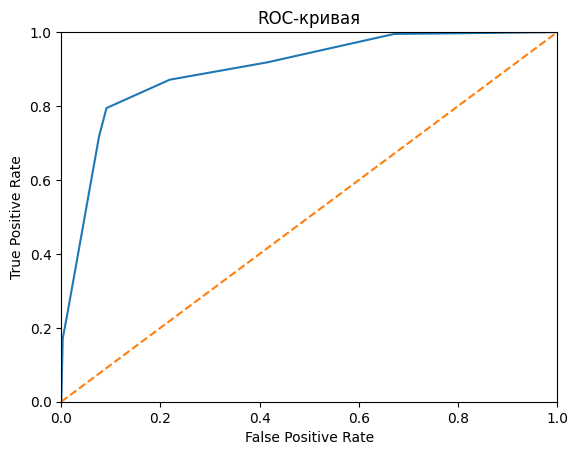

In [ ]:
#обучим модель, используя наилучшие параметры
model_RFC_st = RandomForestClassifier(random_state = RANDOM_STATE, n_estimators=1 , max_depth = 3)
model_RFC_st.fit(X_train,Y_train)
predictions_valid_RFC_st = model_RFC_st.predict(X_test)
predictions_one_valid_RFC_st =  model_RFC_st.predict_proba(X_test)[:,1]
# используем функцию aucroc_curve
aucroc_curve(predictions_valid_RFC_st, predictions_one_valid_RFC_st, 'RFC_standart')

RFC_st_ = (f1_score(Y_test,predictions_valid_RFC_st)).round(3)
RFC_st = (roc_auc_score(Y_test, predictions_one_valid_RFC_st)).round(3)